In [47]:
bin_number = 12

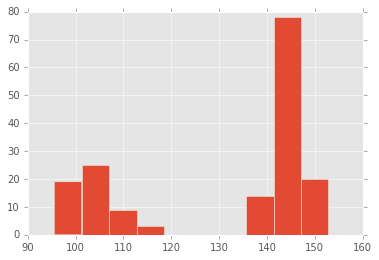

In [54]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
conn = sqlite3.connect("ss.db")
cur  = conn.cursor()

import time
import os

import pandas as pd

qry = """SELECT
bin_contents.BinNumber,
bin_contents.ID_Full,
bouncepoints_full.Event,
bouncepoints_full.Range,
bouncepoints_full.EvtDep,
bouncepoints_full.EvtTime,
bouncepoints_full.Azimuth,
bouncepoints_full.EvtStr,
bouncepoints_full.EvtDip,
bouncepoints_full.EvtRak,
bouncepoints_full.EvtLat,
bouncepoints_full.EvtLon,
bouncepoints_full.StaLat,
bouncepoints_full.StaLon,
snr.SNR,
qcbin%d.Quality
FROM bin_contents
LEFT JOIN bouncepoints_full 
ON bouncepoints_full.ID_Full=bin_contents.ID_Full
LEFT JOIN snr
ON bouncepoints_full.ID_Full=snr.ID_Full
LEFT JOIN qcbin%d
ON bouncepoints_full.ID_Full=qcbin%d.ID_Full
WHERE
bin_contents.BinNumber == %d
AND qcbin%d.Quality == 'good'
ORDER BY bouncepoints_full.EvtDep
""" % (bin_number, bin_number, bin_number, bin_number, bin_number)

dfds = pd.read_sql_query(qry, conn)

%matplotlib inline
dfbins = pd.read_sql_query("SELECT * from bin_parameters", conn)
dfds.Range.hist()

In [55]:
dfds

,BinNumber,ID_Full,Event,Range,EvtDep,EvtTime,Azimuth,EvtStr,EvtDip,EvtRak,EvtLat,EvtLon,StaLat,StaLon,SNR,Quality
0,12,C200701130423A.IU.TRQA,C200701130423A,151.913243,12.0,2007-01-13T04:23:48.100000Z,86.316205,266.0,39.0,-54.0,46.17,154.80,-38.056800,-61.978700,2.397922,good
1,12,C200703311249A.II.ALE,C200703311249A,141.712499,12.0,2007-03-31T12:49:09.700000Z,10.686045,287.0,87.0,1.0,-55.94,-123.61,82.503300,-62.350000,2.138373,good
2,12,C200808191630A.IU.BBSR,C200808191630A,113.489887,12.0,2008-08-19T16:30:20.600000Z,60.829262,111.0,46.0,4.0,-14.85,-173.23,32.371299,-64.696299,2.467880,good
3,12,C201410090214A.AK.EYAK,C201410090214A,96.993114,12.0,2014-10-09T02:14:42.400000Z,343.439504,90.0,39.0,69.0,-32.34,-110.81,60.548700,-145.750000,2.148569,good
4,12,C201410090214A.AK.FID,C201410090214A,97.355782,12.0,2014-10-09T02:14:42.400000Z,343.162619,90.0,39.0,69.0,-32.34,-110.81,60.727700,-146.598700,2.188849,good
5,12,C201410090214A.AK.GLB,C201410090214A,97.329631,12.0,2014-10-09T02:14:42.400000Z,344.706600,90.0,39.0,69.0,-32.34,-110.81,61.441700,-143.812300,2.932458,good
6,12,C201410090214A.AK.GLI,C201410090214A,97.609609,12.0,2014-10-09T02:14:42.400000Z,343.027229,90.0,39.0,69.0,-32.34,-110.81,60.879200,-147.095900,2.408274,good
7,12,C201410090214A.AK.HIN,C201410090214A,97.044066,12.0,2014-10-09T02:14:42.400000Z,343.036325,90.0,39.0,69.0,-32.34,-110.81,60.396000,-146.503500,2.420261,good
8,12,C201410090214A.AK.KTH,C201410090214A,100.832397,12.0,2014-10-09T02:14:42.400000Z,342.931220,90.0,39.0,69.0,-32.34,-110.81,63.552700,-150.923300,2.575708,good
9,12,C201410090214A.AK.MCAR,C201410090214A,97.103483,12.0,2014-10-09T02:14:42.400000Z,345.018733,90.0,39.0,69.0,-32.34,-110.81,61.383600,-143.024000,2.002987,good


In [58]:
from matplotlib import pylab as plt
def plot_location(bin_number):

    binparams = dfbins.query('index == %d' % bin_number)

    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap


    # Lambert Conformal Conic map.
    m = Basemap(llcrnrlon=-135.,llcrnrlat=-10.,urcrnrlon=45.,urcrnrlat=61.,
                projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
                resolution ='l',area_thresh=1000.)
    names = []

    # draw coastlines, meridians and parallels.
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='#99ffff')
    m.fillcontinents(color='#cc9966',lake_color='#99ffff')
    m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
    m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

    x, y = m( np.array(binparams.Longitude), np.array(binparams.Latitude) )

    m.scatter(x, y, color='black', marker = 'o', s=1000, zorder = 10000)

    plt.title('Bin Location')

plt.style.use('ggplot')

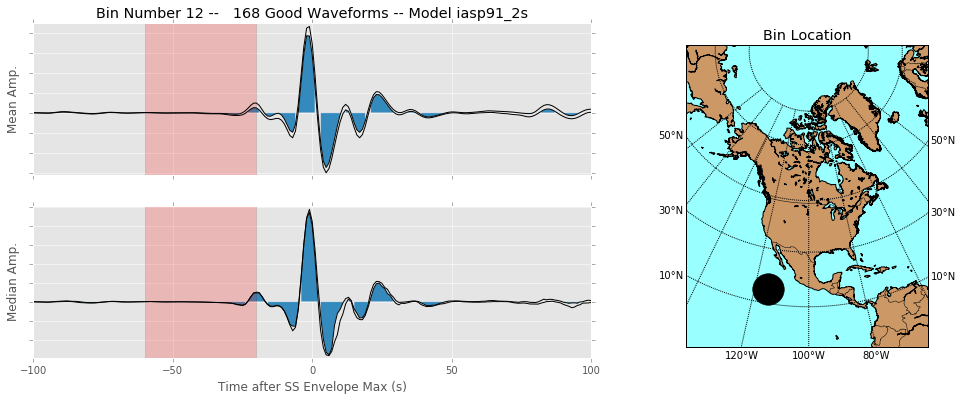

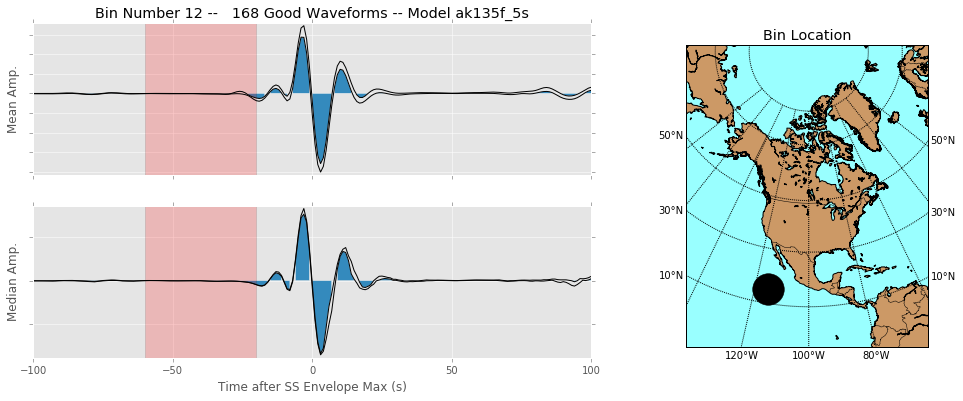

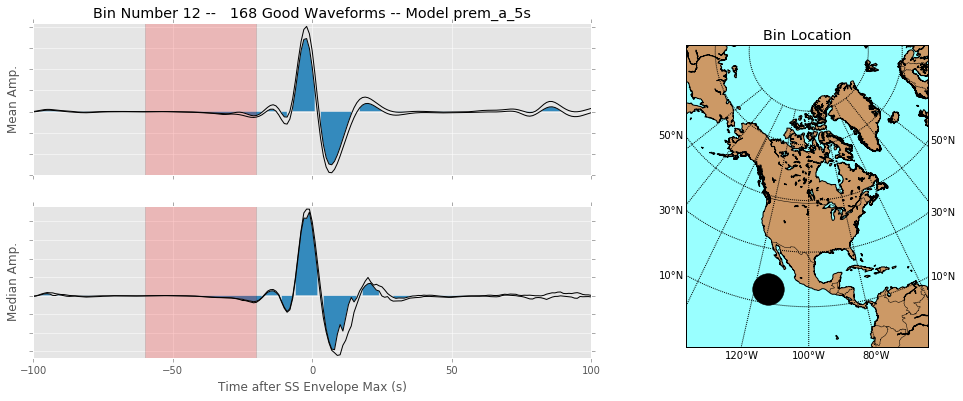

In [72]:
import obspy
from matplotlib import pylab as plt
from numpy import zeros, argmax, nan, sign, arange
from obspy.signal.filter import envelope
from scipy.signal import hilbert

from obspy import UTCDateTime

from numpy import nanmean, nanmedian, nanstd, nanmin, nanmax
from numpy.random import choice

from obspy.clients.syngine import Client
client_syn = Client()

for model in ["iasp91_2s","ak135f_5s","prem_a_5s"]:
    dfbin = dfds.query("BinNumber == %d" % bin_number)

    st = obspy.Stream()
    
    npts = 800
    
    ngood = 0

    rbin = zeros(npts*len(dfbin)).reshape(npts,len(dfbin)) + nan

    for ii, row in enumerate(dfbin.iterrows()):
        
        bpindex = row[1].ID_Full
        
        etime = UTCDateTime(row[1].EvtTime)
        t1 = 'SS-200'
        t2 = 'SS+200'
        
        st0 = client_syn.get_waveforms(model = model,
                                              sourcelatitude=row[1].EvtLat,
                                              sourcelongitude=row[1].EvtLon,
                                              sourcedepthinmeters=1000.*row[1].EvtDep,
                                              receiverlatitude=row[1].StaLat, receiverlongitude=row[1].StaLon,
                                              sourcedoublecouple=[row[1].EvtStr, row[1].EvtDip, row[1].EvtRak],
                                              origintime=etime,
                                              units='acceleration', components = 'T',
                                              starttime=t1, endtime=t2)
        
        st0.detrend().taper(0.05)
        
        st0.filter('lowpass',freq=0.1,corners=4,zerophase=False)
        st0.resample(1)
        
        tr = st0[0]
        tr.data = hilbert(tr.data).imag
        imax = argmax(abs(envelope(tr.data)))
        norm = sign(tr.data[imax])*envelope(tr.data)[imax]
        if imax < 195 or imax > 240:
            print(imax)
            continue
        else:
            ngood += 1
        ishift = int(npts/2 - imax)
        rbin[ishift:ishift+len(tr.data),ii] = hilbert(-tr.data).imag/norm
        #rbin[ishift:ishift+len(tr.data),ii] = tr.data/norm

    #plt.imshow(rbin,aspect='auto',origin='lower')
    #plt.colorbar()
    #plt.show()

    fig = plt.figure(1,figsize=(10,6))

    nboot = 100
    bbin = zeros(800*nboot*2).reshape(800,nboot,2) + nan

    for iboot in range(nboot):
        random_sample = choice(range(len(dfbin)), size = len(dfbin))
        bbin[:,iboot,0] = nanmean(  rbin[:,random_sample],axis=1)
        bbin[:,iboot,1] = nanmedian(rbin[:,random_sample],axis=1)

    for itype in [0,1]:
        plt.subplot(2,1,itype+1)
        
        plt.fill([-60,-60,-20,-20], [-2,2,2,-2], 'r', alpha=0.2, edgecolor='k')
        
        fmin=nanmean(bbin[:,:,itype],axis=1)-2.*nanstd(bbin[:,:,itype],axis=1)
        fmax=nanmean(bbin[:,:,itype],axis=1)+2.*nanstd(bbin[:,:,itype],axis=1)

        times = arange(len(fmin))*tr.stats.delta-npts/2

        #plt.plot(nanmean(bbin,axis=1))
        plt.plot(times,fmax,'k')
        plt.plot(times,fmin,'k')
        plt.fill_between(times,0,fmin, where=fmin>0)
        plt.fill_between(times,fmax,0, where=fmax<0)

        buf=1.04

        plt.ylim(nanmin(fmin)*buf,nanmax(fmax)*buf)
        plt.xlim(-100,+100)
        plt.gca().set_yticklabels([])
        
        if itype == 0:
            plt.title('Bin Number %2d -- %5d Good Waveforms -- Model %s' % (bin_number, ngood, model))
            plt.gca().set_xticklabels([])
            plt.ylabel('Mean Amp.')
        else:
            plt.xlabel('Time after SS Envelope Max (s)')
            plt.ylabel('Median Amp.')
    
    
    ax = fig.add_axes([0.95, 0.15, 0.5, 0.7])
    plot_location(bin_number)
    
    plt.show()